<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Uexternado.jpg" width="240" height="240" align="right"/>

<center><h1>  Estadística Básica con Python.</header1></centre><br>

<left><h1>Sesión 3. DataFrames</header1></centre><br>

Andrés Martínez <br>
Mayo de 2024

1. Carga, lectura y escritura de datos.
2. Creación aleatoria de conjuntos de datos
3. Algunas fuentes de datos de acceso abierto
4. EDA 

## Carga, lectura y escritura de datos.

### Lectura de ficheros CSV

pandas incluye una función que permite cargar los datos de un fichero csv en un dataframe. Esta función es read_csv(). Debemos pasarle como argumentos la ruta donde se encuentra el fichero y, si los valores en el csv están separados por un valor distinto a comas (,), definiremos el nuevo separador con el argumento sep=.

In [1]:
# fichero con cabeceras
import pandas as pd
pd.read_csv('ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [2]:
# fichero sin cabeceras
pd.read_csv('ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [3]:
#poner encabezados
headers = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('ex2.csv', names=headers)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# establece una columna como índice
pd.read_csv('ex2.csv', names=headers, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [5]:
#Archivos txt donde '\s+' significa uno o más caracteres de espacio en blanco.
pd.read_csv('ex3.txt', sep='\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [6]:
#Archivos csv con varios tipos de separadores.
import warnings
warnings.filterwarnings('ignore')
pd.read_csv('ex_sep.csv', sep='[:,|_]')

,Name,Age,City
0,jack,34,Sydeny
1,Riti,31,Delhi
2,Aadi,16,New York
3,Suse,32,Lucknow
4,Mark,33,Las vegas
5,Suri,35,Patna


In [7]:
# eliminando filas no válidas del fichero
pd.read_csv('ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
#Leyendo data con valores faltantes
#By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
pd.read_csv('ex5.csv', na_values=[''])

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,hello
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


In [9]:
#Leyendo data con valores faltantes 'x'
pd.read_csv('ex5_II.csv', na_values=['x'])

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,hello
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


### Escritura de ficheros CSV

De forma similar a la que se pueden recuperar datos desde ficheros, los datos también se pueden exportar a un formato texto (delimitado por comas por defecto) usando el método to_csv de DataFrame y Series.


In [10]:
data = pd.read_csv('ex5.csv', na_values=['x'])
data

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,hello
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


In [11]:
data.to_csv('out.csv', sep=';', na_rep='-')
pd.read_csv('out.csv', sep=';', na_values='-',index_col=[0])

,something,a,b,c,d,message
0,one,1.0,2,3.0,4,hello
1,two,5.0,6,NaN,8,world
2,three,NaN,10,NaN,12,foo


### Leyendo archivos de Microsoft Excel

Pandas también admite la lectura y escritura de datos tabulares en archivos de Excel 2003 (y superiores) utilizando las clases `ExcelFile` y `ExcelWriter` o las funciones `read_excel` y `to_excel`. Internamente, estas herramientas utilizan los paquetes complementarios `xlrd` y `openpyxl` para leer archivos XLS y XLSX, respectivamente (puede que se necesite instalarlos manualmente con pip o conda).

In [12]:
frame = pd.read_excel('ex1.xlsx', 'Sheet1', index_col=[0]) #index_col='id'
frame

,a,b,c,d,message
id,,,,,
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
#Escribir dataframe en archivo 'xlsx'
frame.to_excel('ex2.xlsx')

### Fusionar, unir y concatenar

Para profundizar en estos procesos, acceder a [este enlace](https://pandas.pydata.org/docs/user_guide/merging.html).

## Creación aleatoria de conjuntos de datos

In [14]:
import numpy as np
import pandas as pd 
np.random.seed(1) 
n=10
int_age=np.random.randint(20,25,size=n)
int_yearsofexp=np.random.randint(0, 5, size=n)
float_grade=np.random.uniform(3, 5, size=n)
float_revenue=np.random.normal(25, 3, size=n)
cat_origin=np.random.choice(['Colombia','Venezuela','Otro'], size=n,p=[0.6,0.3,0.1])
df = pd.DataFrame({'age':int_age, 'revenue':float_revenue, 'yearsofexp':int_yearsofexp,'origin':cat_origin,'grade':float_grade})   
#df['origin']=df['origin'].astype('category')
df

,age,revenue,yearsofexp,origin,grade
0,23,26.129970,1,Colombia,4.827924
1,24,26.128405,2,Venezuela,3.914410
2,20,24.507428,4,Colombia,3.861397
3,21,24.746370,2,Colombia,4.878256
4,23,27.794674,4,Venezuela,4.556778
5,20,30.120805,3,Venezuela,4.431941
6,20,22.324259,4,Colombia,4.605515
7,21,30.206790,2,Colombia,3.185602
8,24,23.106675,4,Colombia,4.036305
9,24,22.277970,2,Colombia,4.730041


## Algunas fuentes de datos de acceso abierto (agregar open data y datareader, wb)

### Datasets en Librerias de Python

* En [PyDataset](https://github.com/iamaziz/PyDataset)

In [15]:
from pydataset import data
import pandas as pd
pd.options.display.max_rows = None
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [16]:
data('titanic', show_doc=True)
data('titanic').head()

titanic

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## titanic

### Description

The data is an observation-based version of the 1912 Titanic passenger
survival log,

### Usage

    data(titanic)

### Format

A data frame with 1316 observations on the following 4 variables.

`class`

a factor with levels `1st class` `2nd class` `3rd class` `crew`

`age`

a factor with levels `child` `adults`

`sex`

a factor with levels `women` `man`

`survived`

a factor with levels `no` `yes`

### Details

titanic is saved as a data frame. Used to assess risk ratios

### Source

Found in many other texts

### References

Hilbe, Joseph M (2014), Modeling Count Data, Cambridge University Press Hilbe,
Joseph M (2007, 2011), Negative Binomial Regression, Cambridge University
Press Hilbe, Joseph M (2009), Logistic Regression Models, Chapman & Hall/CRC

### Examples

    data(titanic)
    titanic$survival <- titanic$survived == "yes"
    glmlr <- glm(survival ~

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [17]:
data('sleepstudy', show_doc=True)
data('sleepstudy').head()

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


* En [Seaborn](https://github.com/mwaskom/seaborn-data)

In [18]:
# Import seaborn
import seaborn as sns
# Check out available datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [19]:
# Load as a dataframe
df = sns.load_dataset('iris')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* En [Sklearn](https://scikit-learn.org/stable/datasets.html)

In [20]:
# Import package
from sklearn.datasets import fetch_california_housing
# Load data (will download the data if it's the first time loading)
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
housing = fetch_california_housing(as_frame=True)
# Create a dataframe
df = housing['data'].join(housing['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* En [Statmodels](https://www.statsmodels.org/devel/datasets/index.html)

In [22]:
# Import package
import statsmodels.api as sm
# Load data as a dataframe
#https://www.statsmodels.org/dev/datasets/generated/macrodata.html
df = sm.datasets.macrodata.load_pandas()['data']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


* En [OpenML](https://www.openml.org/) (4333 datasets)

In [23]:
#! pip install openml
import openml
import pandas as pd
datasets_df = openml.datasets.list_datasets(output_format="dataframe")
datasets_df.head()
print("First 10 of %s datasets..." % len(datasets_df))
print(datasets_df[:10][['did','name','NumberOfInstances','NumberOfFeatures']])

First 10 of 5509 datasets...
    did             name  NumberOfInstances  NumberOfFeatures
2     2           anneal              898.0              39.0
3     3         kr-vs-kp             3196.0              37.0
4     4            labor               57.0              17.0
5     5       arrhythmia              452.0             280.0
6     6           letter            20000.0              17.0
7     7        audiology              226.0              70.0
8     8  liver-disorders              345.0               6.0
9     9            autos              205.0              26.0
10   10            lymph              148.0              19.0
11   11    balance-scale              625.0               5.0


In [ ]:
labor = openml.datasets.get_dataset(4)
print(labor.features)
print(labor.description)

In [ ]:
# OpenML
#traer en enlace de la versión csv
import pandas as pd 
#https://www.openml.org/search?type=data&sort=runs&status=active
#url = "https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
#url="https://www.openml.org/data/get_csv/4/dataset_4_labor.arff"
#url="https://www.openml.org/data/get_csv/31/dataset_31_credit-g.arff"
url="https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
data = pd.read_csv(url)
data.head()

* En [GitHub](https://github.com/)

In [ ]:
#desde GitHub version raw
import pandas as pd
import requests
url='https://raw.githubusercontent.com/cs109/2014_data/master/mtcars.csv'
c=pd.read_csv(url)
c.head()

In [ ]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/arrivals2018.csv'
df = pd.read_csv(url)
df.head()


In [ ]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/millerjanny/UAM2022/main/SavingData.csv'
df = pd.read_csv(url)
df.head()


* Con [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html):

    + World Bank
    + OECD
    + Eurostat
    + Thrift Savings Plan
    + Nasdaq Trader symbol definitions
    + Stooq
    + MOEX
    + Naver Finance
    + Yahoo Finance
    + ...

In [ ]:
import pandas_datareader as pdr
from pandas_datareader import wb
#https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?view=chart
#https://data.worldbank.org/indicator/SH.DYN.MORT?view=chart
#SL.UEM.TOTL.ZS
#SH.DYN.MORT
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
dat = wb.download(indicator='SL.UEM.TOTL.ZS',start=2005, end=2021, country=['US', 'CA', 'MX','COL']) #otra manera https://jeremymikecz.com/498/5_wbdata_demo.html (wbdata)
dat=pd.DataFrame(dat)
dat.rename(columns={'SL.UEM.TOTL.ZS':'UR'}, inplace=True)
dat

In [ ]:
#dat['UR'].groupby(level=0).mean()
pd.DataFrame(dat['UR'].groupby('country').mean())

In [ ]:
import pandas_datareader.data as pdr
import datetime
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2016, 1, 27)
df = pdr.DataReader('GOOGL', 'yahoo', start, end)
df_close=df[['Close']]
df_close

### Otras fuentes de datos de acceso abierto

A continuación otra pequeña muestra de fuentes de datos de acceso abierto: 
      
+ [Kaggle](https://www.kaggle.com/datasets). Se creó para ayudar a las empresas a organizar concursos de ciencia de datos para resolver problemas complejos utilizando datos. 
+ [FiveThirtyEight](https://data.fivethirtyeight.com/). Datos de periodismo. Datos detras de las noticias de política, ciencia, cultura, deportes, entre otros. Principalmente contiene información de Estados Unidos.
+ [Banco Mundial](https://datos.bancomundial.org/). Información de diferentes paises y aspectos que buscan ayudar a mejorar la calidad de vida a través de los datos.
+ [Repositorio UCI ML](https://archive.ics.uci.edu/ml/datasets.php). El repositorio UCI Machine Learning alberga una colección de bases de datos y datasets que son utilizados por la comunidad para el análisis empírico de algoritmos de Machine Learning.Actualmente alberga más de 500 conjuntos de datos. Para citarlo: https://archive.ics.uci.edu/ml/citation_policy.html.
+ [data.world](https://data.world/) data.world alberga una de las mayores comunidades de datos colaborativos del mundo, gratuita y está abierta al público. Hay aproximadamente [132583](https://data.world/datasets/open-data) datasets disponibles. 
+[Harvard Dataverse](https://dataverse.harvard.edu/) Harvard Dataverse es un repositorio de datos en línea donde se pueden compartir, preservar, citar, explorar y analizar datos de investigación. Está abierto a todos los investigadores, tanto dentro como fuera de la comunidad de Harvard. Harvard Dataverse proporciona acceso a una rica gama de conjuntos de datos para apoyar su investigación.

In [ ]:
import os
 
os.environ['KAGGLE_USERNAME'] = 'milljanny'
os.environ['KAGGLE_KEY'] = '2d0006da9d34ce9c3d2e72a4fb2d7549'
 
from kaggle.api.kaggle_api_extended import KaggleApi

#https://www.kaggle.com/datasets/uciml/german-credit
dataset ='uciml/german-credit'
path = 'datasets2/credit'
 
api = KaggleApi()
api.authenticate()
 
api.dataset_download_file(dataset, 'german_credit_data.csv', path)

import pandas as pd

df = pd.read_csv(r"datasets2/credit/german_credit_data.csv", index_col=[0])

df.head()

## EDA. Introducción

><figure><center>
  <img src="https://datos.gob.es/sites/default/files/u322/grafico.jpg" alt="EDA_FE" width=800 height=800/>
  <figcaption> EDA <a href="https://datos.gob.es/en/documentacion/practical-introductory-guide-exploratory-data-analysis">Source</a></figcaption>
</figure><center> 

EDA (Exploratory Data Analysis) es un proceso sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y comprobar supuestos. Aunque es una tarea que puede ser transversal, es imprescindible previo a la tarea de modelación. El EDA se utiliza principalmente para ver lo que los datos pueden revelar. Proporciona una mejor comprensión de las variables del conjunto de datos y de las relaciones entre ellas. Puede ayudar a determinar si las técnicas de modelación o el método de análisis que estás considerando es adecuado. Ayuda a definir los pasos de limpieza, transformación y selección de datos. Confirma o definine los procesos de modelación. Entiendes si es posible alcanzar los objetivos propuestos. Descubres errores o limitaciones de los datos.
Clarificas y delimitas el problema (¿Qué pregunta intentas resolver?). Ayuda a responder: ¿Cómo puedes añadir, transformar, seleccionar o eliminar features para sacar más provecho de tus datos?, entre otros aspectos.

El proceso de EDA incluye:

¿Qué tipo de datos tienes y cómo tratar los diferentes tipos que encuentras?
  + Tamaños: Columnas (atributos) y filas (registros, observaciones o instancias)
  + Tipos de datos a nivel informático
  + Tipos de datos a nivel estadístico
  + Tipos  de datos por temporalidad
  
¿Qué valores ves?, Qué distribuciones encuentras? ¿Qué relaciones hay? ¿Qué patrones identificas? ¿Qué relaciones aportan o afectan a la solución del problema?
  + Análisis estadístico desccriptivo: univariado, bivariado, multivariado 
  + Análisis estadístico inferencial 
  
¿Qué errores hay en los datos y cómo se aborda esta situación?<br/>
  + Hay información duplicada, errores de captura, typos, información erronea
  
¿Qué es lo que falta en los datos y cómo se aborda esta situación?<br/>
  + Missing values
  
¿Hay valores atípicos?¿Cómo tratarlos? (No siempre se identifican en un análisis univariado, en ocasiones es necesario hacer un análsis conjunto o multivariado?
En Series de tiempo el trato de los outliers puede ser diferente.<br/>
  + Outliers. 
  Para su identificación podemos usar métodos univariados o multivariados. Es una línea de investigación. A nivel univariado podemos usar algún límite definido por experticia, la media y la desviación estandar bajo normalidad, el IQR, entre otros métodos. 
  
  
  
><div class="alert alert-block alert-warning">
<b>Algunas Reflexiones con el proceso EDA:</b> <ul>
 <li> EL EDA no es un proceso con un conjunto de reglas y tareas estrictas a realizar. Depende del problema y de su contexto.</li>
 <li> No siempre se dispone de información sobre el dataset como lo proporcionan los ejemplos de clase, cursos o de la Web. </li>
 <li> En este proceso, es necesario mantener una comunicación fluida y continua con los expertos del tema. Esto no sólo puede ahorrarte tiempo y te da respuestas, también influye en las preguntas que hagas sobre los datos.</li>
 <li> En ocasiones el experto no tiene suficiente conocimiento de los datos que tienen y del problema que desea solucionar. El EDA puede ayudar a clarificar y delimitar el problema, identificar otros problemas y establecer los alcances reales.</li>
 <li> No se trata de crear un informe, sino de comprender el problema.</li>
 <li> Estas buscando establecer una serie de hipótesis que deseas explorar al modelar. Buscas tener una mayor comprension e intuición de los datos.</li>
 <li> Hay que pasar tiempo con los datos.</li>
 <li> Evitar el sesgo de complejidad (tendencia a preferir las soluciones complejas a las simples). No siempre lo complejo y más sofisticado es lo mejor.</li>
 <li> Los modelos son tan buenos como las preguntas y la comprensión que tengas de los datos y del problema.</li>
 <li> GIGO: Garbage in, garbage out.</li> 
</ul> 
</div>

><figure><center>
  <img src="https://i2.wp.com/timoelliott.com/blog/wp-content/uploads/2013/07/crossed-fingers.png?resize=525%2C382&ssl=1" alt="EDA_FE" width=400 height=400/>
  <figcaption>Source:<a href="https://timoelliott.com/blog/cartoons/analytics-cartoons"> Timo Elliott</a></figcaption></figure></center> 
    
Para realizar este proceso hay varios paquetes: 



In [24]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/SavingData.csv'
df = pd.read_csv(url)
df.info()
df.head()
#df.sample(2)
#df.tail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37244 entries, 0 to 37243
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROMBEF_n      37244 non-null  object 
 1   PROMAFT_n      37244 non-null  float64
 2   TRATAMIENTO_N  37244 non-null  object 
 3   Af_inver       37244 non-null  object 
 4   asisten        37244 non-null  int64  
 5   EDAD           37244 non-null  int64  
 6   GENERO         37244 non-null  object 
 7   TIPOPOBLACION  37244 non-null  object 
 8   CATEGORIA1     37244 non-null  object 
 9   ZONAREG        37244 non-null  object 
 10  EDADCAT        37244 non-null  object 
 11  NUM_NUC        37244 non-null  object 
 12  Puntaje        37244 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 3.7+ MB


,PROMBEF_n,PROMAFT_n,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje
0,7746.451,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,FEMENINO,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457
1,24491.878,14491.783077,EDUCACION,AFECTADO,6,39,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380
2,12189.591,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408
3,14315.209,12982.394615,INCENTIVO,AFECTADO,0,32,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244
4,51391.396,19692.766154,EDUCACION,AFECTADO,1,35,FEMENINO,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560


In [25]:
print(df.shape)#dimensión del dataset 
print(df.columns) #columnas del dataset

(37244, 13)
Index(['PROMBEF_n', 'PROMAFT_n', 'TRATAMIENTO_N', 'Af_inver', 'asisten',
       'EDAD', 'GENERO', 'TIPOPOBLACION', 'CATEGORIA1', 'ZONAREG', 'EDADCAT',
       'NUM_NUC', 'Puntaje'],
      dtype='object')


#### Análisis descriptivo

##### Tablas de frecuencia

In [27]:
#Frecuencia absoluta de asistencia
df_asis=pd.DataFrame(df['asisten'].value_counts(normalize=False)).reset_index()
df_asis.columns = ['Asisitencia_values', 'Absoluta']
df_asis.sort_values(by=['Asisitencia_values'],inplace=True)
df_asis['Absoluta_acum'] = df_asis['Absoluta'].cumsum()


In [ ]:
#Frecuencia relativa de edad
df_asis=pd.DataFrame(df['asisten'].value_counts(normalize=True)).reset_index()
df_asis.columns = ['Asisitencia_values', 'Relativa']
df_asis.sort_values(by=['Asisitencia_values'],inplace=True)
df_asis['Relativa_acum%'] = df_asis['Relativa'].cumsum()*100
df_asis.style.hide_index()

Asisitencia_values,Relativa,Relativa_acum%
0,0.639942,63.994200
1,0.030690,67.063151
2,0.032435,70.306627
3,0.075448,77.851466
4,0.068092,84.660616
5,0.077919,92.452476
6,0.075475,100.000000


In [ ]:
#Tabla de frecuencias edad por intervalos
import numpy as np
#bins=‘sqrt’ (https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html)
#Sturges: K = 1 + 3.3*Log(n)
bins=np.round(np.histogram_bin_edges(df['EDAD'], bins='sturges'), decimals=1)
#bins=10 
#df['EDAD_bins'] = pd.cut(x=df['EDAD'], bins=bins,include_lowest=False, precision=1)
df['EDAD_bins'] = pd.cut(x=df['EDAD'], bins=bins,include_lowest=True)
display(df.head())
df_edad=pd.DataFrame(df['EDAD_bins'].value_counts()).reset_index()
df_edad.columns = ['Edad_intervals', 'absoluta']
df_edad.sort_values(by=['Edad_intervals'],inplace=True)
df_edad['absoluta acum'] = df_edad['absoluta'].cumsum()
df_edad.style.hide_index()

,PROMBEF_n,PROMAFT_n,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins
0,7746.451,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,FEMENINO,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]"
1,24491.878,14491.783077,EDUCACION,AFECTADO,6,39,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]"
2,12189.591,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]"
3,14315.209,12982.394615,INCENTIVO,AFECTADO,0,32,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]"
4,51391.396,19692.766154,EDUCACION,AFECTADO,1,35,FEMENINO,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]"


Edad_intervals,absoluta,absoluta acum
"(17.999, 22.4]",760,760
"(22.4, 26.7]",3926,4686
"(26.7, 31.1]",6660,11346
"(31.1, 35.4]",5390,16736
"(35.4, 39.8]",4919,21655
"(39.8, 44.1]",5395,27050
"(44.1, 48.5]",3285,30335
"(48.5, 52.8]",2529,32864
"(52.8, 57.2]",2046,34910
"(57.2, 61.5]",919,35829


In [ ]:
df_edad=pd.DataFrame(df['EDAD_bins'].value_counts(normalize=True)).reset_index()
df_edad.columns = ['Edad_intervals', 'realtiva']
df_edad.sort_values(by=['Edad_intervals'],inplace=True)
df_edad['realtiva_acum'] = df_edad['realtiva'].cumsum()
df_edad.style.hide_index()

Edad_intervals,realtiva,realtiva_acum
"(17.999, 22.4]",0.020406,0.020406
"(22.4, 26.7]",0.105413,0.125819
"(26.7, 31.1]",0.178821,0.304640
"(31.1, 35.4]",0.144721,0.449361
"(35.4, 39.8]",0.132075,0.581436
"(39.8, 44.1]",0.144856,0.726291
"(44.1, 48.5]",0.088202,0.814494
"(48.5, 52.8]",0.067904,0.882397
"(52.8, 57.2]",0.054935,0.937332
"(57.2, 61.5]",0.024675,0.962007


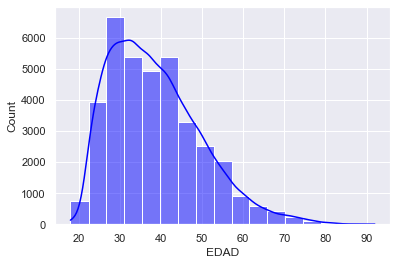

In [ ]:
#Histograma
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.histplot(data=df, x="EDAD", kde=True, color="blue", bins=bins)

plt.show()

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(7, 7))
sns.histplot(data=df, x="EDAD", kde=True, color="skyblue", ax=axes[0])
sns.histplot(data=df, x="Puntaje", kde=True, color="olive", ax=axes[1])
plt.show()

In [ ]:
#Tabla de frecuencias de una variable categórica
df_trata=pd.crosstab(index=df['TRATAMIENTO_N'], columns='count')
df_trata['Frec relativa']=df_trata/df_trata.sum()
df_trata.reset_index(inplace=True)#index como columna
df_trata.style.hide_index()

In [ ]:
### barplot Tratamiento
#df["TRATAMIENTO_N"].value_counts().plot(kind='bar')
df["TRATAMIENTO_N"].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribución de Tratamiento")

##### Tablas de contingencia

In [ ]:
#Frecuencias absolutas
pd.crosstab(df.TRATAMIENTO_N, df.GENERO)

In [ ]:
#Frecuencias absolutas con totales
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total")

In [ ]:
#Frecuencias realtiva al total de datos
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize=True)

In [ ]:
#Frecuencias realtiva al total de la columna
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize='columns')

In [ ]:
#Frecuencias realtiva al total de la fila
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize='index')

In [ ]:
#más de crosstab (https://pbpython.com/pandas-crosstab.html)

## Ejercicios

1. Crear cuenta Kaggle y descargar algún conjunto de datos desde la plataforma
2. Crear cuenta GitHub y descargar algún conjunto de datos desde su cuenta
3. Realizar un análisis de frecuencias a algunos de los dataset de los puntos anteriores
4. Install:
    1. pip install pandas-profiling
    2. pip install dataprep
    3. pip install autoviz
    4. pip install dtale


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c05c5de4-ddc6-4505-bb2d-095b409650b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>